In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

X = np.load('features.npy')
y = np.load('labels.npy')

/Users/Tom/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Tom/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Tom/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Tom/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

1


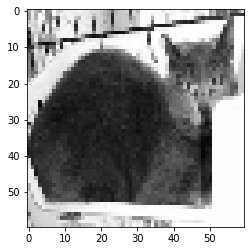

In [3]:
print(y[515])
plt.imshow(X[515].reshape(60,60), cmap='gray')
plt.show()

In [4]:
X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X, y, batch_size=12, epochs=3, validation_split=0.1)

Instructions for updating:
Colocations handled automatically by placer.
Train on 22451 samples, validate on 2495 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
22451/22451 [==============================] - 241s 11ms/sample - loss: 0.6523 - acc: 0.6105 - val_loss: 0.6044 - val_acc: 0.6701
Epoch 2/3
22451/22451 [==============================] - 231s 10ms/sample - loss: 0.5615 - acc: 0.7095 - val_loss: 0.5454 - val_acc: 0.7299
Epoch 3/3
22451/22451 [==============================] - 241s 11ms/sample - loss: 0.4894 - acc: 0.7599 - val_loss: 0.5140 - val_acc: 0.7567
